<a href="https://colab.research.google.com/github/Nacho2904/CURSO-LEARNING1/blob/tareas/tarea_de_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea de dl

## setup

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing

## I) Aproximación universal

### I-I, clasificación

#### I-I-I

Generar una base de datos de una XOR con todas las posibles combinaciones de
±1 (4 casos). Asignar los labels correspondientes (1 si ambas entradas son diferentes,
0 si son iguales)

In [ ]:
# Utilizo ⊕ para denotar el operador XOR entre dos elementos
X = np.array([1,0,1,0,1,1,1,1,0,0,0,0]).reshape(4,3)
df_xor = pd.DataFrame(X)
df_xor.columns = ["Value of X", "Value of Y", "Value of X⊕Y"]
df_xor

,Value of X,Value of Y,Value of X⊕Y
0,1,0,1
1,0,1,1
2,1,1,0
3,0,0,0


#### I-I-II

Entrenar una red neuronal con activación ReLU que alcance 100 % de accuracy.
¿Cuál es la mínima dimensión de la unidad oculta para lograr esto?

In [ ]:
input = tf.keras.layers.Input(shape = (2,), name = "Input_layer")
x_1 = tf.keras.layers.Dense(4, name = "First_hidden_unit", activation = "ReLU")(input)
output = tf.keras.layers.Dense(1)(x_1)
model = tf.keras.models.Model(inputs = input, outputs = output)
model.summary()

Model: "model_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 2)]               0         
                                                                 
 First_hidden_unit (Dense)   (None, 4)                 12        
                                                                 
 dense_16 (Dense)            (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


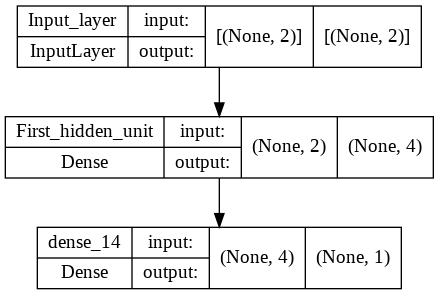

In [ ]:
tf.keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.3),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])
hist = model.fit(x=df_xor[["Value of X", "Value of Y"]], y=df_xor["Value of X⊕Y"], batch_size = 4, epochs=300,callbacks=[early_stop]);

Epoch 1/300
1/1 [==============================] - 0s 297ms/step - loss: 0.7205 - accuracy: 0.5000
Epoch 2/300
1/1 [==============================] - 0s 10ms/step - loss: 0.7149 - accuracy: 0.5000
Epoch 3/300
1/1 [==============================] - 0s 7ms/step - loss: 0.7091 - accuracy: 0.5000
Epoch 4/300
1/1 [==============================] - 0s 7ms/step - loss: 0.7039 - accuracy: 0.5000
Epoch 5/300
1/1 [==============================] - 0s 11ms/step - loss: 0.6985 - accuracy: 0.5000
Epoch 6/300
1/1 [==============================] - 0s 9ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 7/300
1/1 [==============================] - 0s 8ms/step - loss: 0.6886 - accuracy: 0.5000
Epoch 8/300
1/1 [==============================] - 0s 9ms/step - loss: 0.6839 - accuracy: 0.5000
Epoch 9/300
1/1 [==============================] - 0s 7ms/step - loss: 0.6791 - accuracy: 0.5000
Epoch 10/300
1/1 [==============================] - 0s 7ms/step - loss: 0.6745 - accuracy: 0.5000
Epoch 11/300
1/1 [=======

#### I-I-III

repetir con activación sigmoide. Extraer conclusiones.

In [ ]:
input = tf.keras.layers.Input(shape = (2,), name = "Input_layer")
x_1 = tf.keras.layers.Dense(2, name = "First_hidden_unit", activation = "sigmoid")(input)
output = tf.keras.layers.Dense(1)(x_1)
model = tf.keras.models.Model(inputs = input, outputs = output)
model.summary()

Model: "model_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 2)]               0         
                                                                 
 First_hidden_unit (Dense)   (None, 2)                 6         
                                                                 
 dense_31 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=10),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])
hist = model.fit(x=df_xor[["Value of X", "Value of Y"]], y=df_xor["Value of X⊕Y"], batch_size = 4, epochs=300,callbacks=[early_stop]);

Epoch 1/300
1/1 [==============================] - 0s 303ms/step - loss: 0.7504 - accuracy: 0.5000
Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 0.9954 - accuracy: 0.5000
Epoch 3/300
1/1 [==============================] - 0s 7ms/step - loss: 1.3741 - accuracy: 0.5000
Epoch 4/300
1/1 [==============================] - 0s 6ms/step - loss: 1.3919 - accuracy: 0.5000
Epoch 5/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0541 - accuracy: 0.5000
Epoch 6/300
1/1 [==============================] - 0s 10ms/step - loss: 1.0693 - accuracy: 0.5000
Epoch 7/300
1/1 [==============================] - 0s 8ms/step - loss: 1.0667 - accuracy: 0.5000
Epoch 8/300
1/1 [==============================] - 0s 7ms/step - loss: 1.0639 - accuracy: 0.5000
Epoch 9/300
1/1 [==============================] - 0s 7ms/step - loss: 1.0603 - accuracy: 0.5000
Epoch 10/300
1/1 [==============================] - 0s 8ms/step - loss: 1.0574 - accuracy: 0.5000
Epoch 11/300
1/1 [========

### I-II) Regresión

#### I-II-I

Generar una base de datos de la función f (x, y, z) = sin(x) + cos(y) + z. Para ello
barra una grilla de 20 puntos para cada coordenada (0 ≤ x < 2π, 0 ≤ y < 2π y
0 ≤ z ≤ 1) y arme una base de datos con las 8000 combinaciones posibles.

In [ ]:
f = lambda x,y,z: np.sin(x) + np.cos(y) + z
x_axis = np.arange(0,2*np.pi, np.pi/10)
y_axis = np.arange(0,2*np.pi, np.pi/10)
z_axis = np.arange(0,1,1/20)

x_y_z_coordinates = [[x,y,z] for x in x_axis for y in y_axis for z in z_axis]
df_function = pd.DataFrame(x_y_z_coordinates)
df_function.columns = ["x", "y", "z"]
df_function["f(x,y,z)"] = f(df_function["x"],df_function["y"],df_function["z"])
df_function

,x,y,z,"f(x,y,z)"
0,0.000000,0.000000,0.00,1.00000
1,0.000000,0.000000,0.05,1.05000
2,0.000000,0.000000,0.10,1.10000
3,0.000000,0.000000,0.15,1.15000
4,0.000000,0.000000,0.20,1.20000
...,...,...,...,...
7995,5.969026,5.969026,0.75,1.39204
7996,5.969026,5.969026,0.80,1.44204
7997,5.969026,5.969026,0.85,1.49204
7998,5.969026,5.969026,0.90,1.54204


#### I-II-II

Entrenar una red neuronal con activación ReLU e indique el error cuadrático medio. Grafique f(x, x, x) y comparela con la salida del regresor barriendo x.

In [ ]:
input = tf.keras.layers.Input(3, name="Input_layer")
x_1 = tf.keras.layers.Dense(128, input_dim = 3, activation = "ReLU")(input)
output = tf.keras.layers.Dense(1)(x_1)
model = tf.keras.models.Model(inputs = input, outputs = output)
model.summary()

Model: "model_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 dense_66 (Dense)            (None, 128)               512       
                                                                 
 dense_67 (Dense)            (None, 1)                 129       
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),loss='MeanSquaredError')
hist = model.fit(x=df_function[["x", "y", "z"]], y=df_function["f(x,y,z)"], batch_size = len(df_function), epochs=10000,callbacks=[es])

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 15ms/step - loss: 0.1076
Epoch 7502/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1076
Epoch 7503/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1076
Epoch 7504/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.1075
Epoch 7505/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1075
Epoch 7506/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1075
Epoch 7507/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.1075
Epoch 7508/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1075
Epoch 7509/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1075
Epoch 7510/10000
1/1 [==============================] - 0s 16ms/step - loss: 0.1075
Epoch 7511/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.1075
Epoch 7512/10000
1/1 [====================

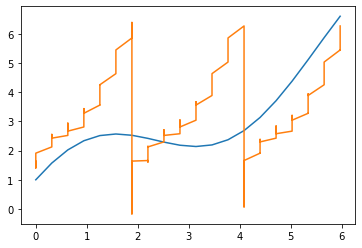

In [ ]:
df_function["f(x,x,x)"] = f(df_function["x"], df_function["x"], df_function["x"])
df_function
xxx_matrix = np.array([df_function["x"],df_function["x"],df_function["x"]]).reshape(8000,3)
predicted_f_xxx = model.predict(xxx_matrix)
plt.plot(df_function["x"], df_function["f(x,x,x)"])
plt.plot(df_function["x"], predicted_f_xxx);

#### I-II-III

In [ ]:
input = tf.keras.layers.Input(3, name="Input_layer")
x_1 = tf.keras.layers.Dense(128, input_dim = 3, activation = "sigmoid")(input)
output = tf.keras.layers.Dense(1)(x_1)
model = tf.keras.models.Model(inputs = input, outputs = output)
model.summary()

Model: "model_101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 dense_70 (Dense)            (None, 128)               512       
                                                                 
 dense_71 (Dense)            (None, 1)                 129       
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.015),loss='MeanSquaredError')
hist = model.fit(x=df_function[["x", "y", "z"]], y=df_function["f(x,y,z)"], batch_size = len(df_function), epochs=10000,callbacks=[es])

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 16ms/step - loss: 0.1561
Epoch 7502/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.1561
Epoch 7503/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1561
Epoch 7504/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.1561
Epoch 7505/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1560
Epoch 7506/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.1560
Epoch 7507/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1560
Epoch 7508/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1560
Epoch 7509/10000
1/1 [==============================] - 0s 257ms/step - loss: 0.1559
Epoch 7510/10000
1/1 [==============================] - 0s 24ms/step - loss: 0.1559
Epoch 7511/10000
1/1 [==============================] - 0s 26ms/step - loss: 0.1559
Epoch 7512/10000
1/1 [===================

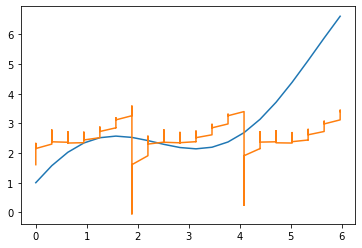

In [ ]:
predicted_f_xxx = model.predict(xxx_matrix)
plt.plot(df_function["x"], df_function["f(x,x,x)"])
plt.plot(df_function["x"], predicted_f_xxx);

In [ ]:
def reset_weights(model):
    for l in model.layers:
        if hasattr(l,"kernel_initializer"):
            l.kernel.assign(l.kernel_initializer(tf.shape(l.kernel)))
        if hasattr(l,"bias_initializer"):
            l.bias.assign(l.bias_initializer(tf.shape(l.bias)))
        if hasattr(l,"recurrent_initializer"):
            l.recurrent_kernel.assign(l.recurrent_initializer(tf.shape(l.recurrent_kernel)))

input = tf.keras.layers.Input(3, name="Input_layer")
x_1 = tf.keras.layers.Dense(128, input_dim = 3, activation = "ReLU")(input)
output = tf.keras.layers.Dense(1)(x_1)
model = tf.keras.models.Model(inputs = input, outputs = output)
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 dense_10 (Dense)            (None, 128)               512       
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


Usando SGD en vez de GD tradicional

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
hists = []
learning_rates = [0.01, 0.1, 1, 0.0001]
for lr in learning_rates:
  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr),loss='MeanSquaredError')
  hists.append(model.fit(x=df_function[["x", "y", "z"]], y=df_function["f(x,y,z)"], batch_size = 64, epochs=50,callbacks=[es]))
  reset_weights(model)


Epoch 1/50
125/125 [==============================] - 0s 1ms/step - loss: 0.7647
Epoch 2/50
125/125 [==============================] - 0s 2ms/step - loss: 0.5203
Epoch 3/50
125/125 [==============================] - 0s 1ms/step - loss: 0.4523
Epoch 4/50
125/125 [==============================] - 0s 2ms/step - loss: 0.4078
Epoch 5/50
125/125 [==============================] - 0s 2ms/step - loss: 0.3733
Epoch 6/50
125/125 [==============================] - 0s 1ms/step - loss: 0.3428
Epoch 7/50
125/125 [==============================] - 0s 2ms/step - loss: 0.3131
Epoch 8/50
125/125 [==============================] - 0s 2ms/step - loss: 0.2898
Epoch 9/50
125/125 [==============================] - 0s 2ms/step - loss: 0.2673
Epoch 10/50
125/125 [==============================] - 0s 2ms/step - loss: 0.2459
Epoch 11/50
125/125 [==============================] - 0s 2ms/step - loss: 0.2276
Epoch 12/50
125/125 [==============================] - 0s 2ms/step - loss: 0.2160
Epoch 13/50
125/125 [====

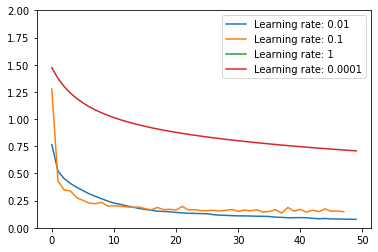

In [ ]:
for i in range(len(hists)):
  plt.plot(np.arange(0,len(hists[i].history["loss"]), 1), hists[i].history["loss"], label=f"Learning rate: {learning_rates[i]}");
plt.legend()
plt.ylim(0,2);
# la idea era reproducir algo similar a las curvas de entrenamiento en https://cs231n.github.io/neural-networks-3/.

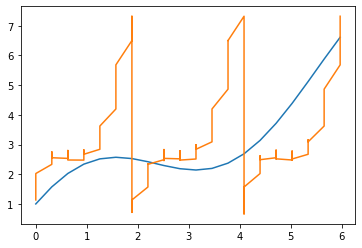

In [ ]:
df_function["f(x,x,x)"] = f(df_function["x"], df_function["x"], df_function["x"])
df_function
xxx_matrix = np.array([df_function["x"],df_function["x"],df_function["x"]]).reshape(8000,3)
predicted_f_xxx = model.predict(xxx_matrix)
plt.plot(df_function["x"], df_function["f(x,x,x)"])
plt.plot(df_function["x"], predicted_f_xxx);

## III) Regularización

### III.I. Autoencoder

#### Autoencoder

Con FASHION-MNIST construir un autoencoder (utilizar la base de datos como entrenamiento/validación).

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (validation_images, validation_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


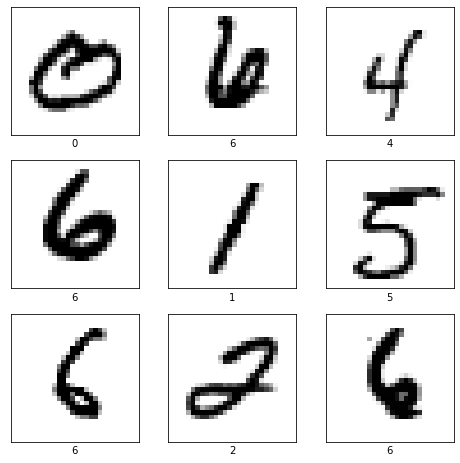

In [ ]:
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, train_images.shape[0])
  plt.imshow(train_images[img_index], cmap="gray_r")
  plt.xlabel(train_labels[img_index])

In [ ]:
batch_size = 64
hidden_units = 300
learning_rate = 0.01
image_vector_length = train_images.shape[1]*train_images.shape[2]

input = tf.keras.layers.Input(shape = (28,28), name="Input_layer")
flatten_input = tf.keras.layers.Flatten()(input)
encode = tf.keras.layers.Dense(units = hidden_units, activation = "ReLU", kernel_initializer = tf.keras.initializers.HeNormal())(flatten_input)
decode = tf.keras.layers.Dense(image_vector_length, kernel_initializer = tf.keras.initializers.HeNormal())(encode)
reshape_to_image_and_output = tf.keras.layers.Reshape((28,28))(decode)

model_autoencoder = tf.keras.models.Model(inputs = input, outputs = reshape_to_image_and_output)
model_autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 784)               235984    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 471,484
Trainable params: 471,484
Non-trainable params: 0
_________________________________________________________________


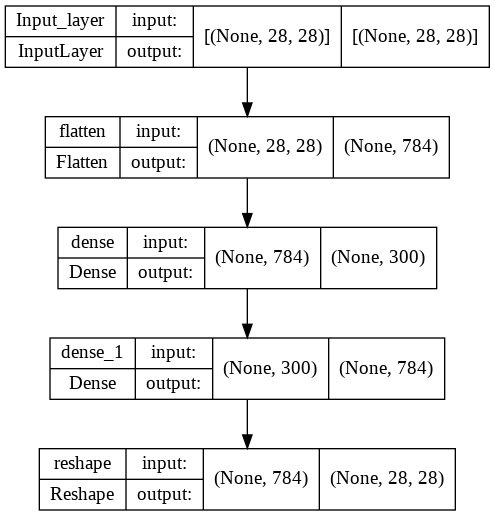

In [ ]:
tf.keras.utils.plot_model(model_autoencoder, "Arquitectura del autoencoder.png", show_shapes=True)

In [15]:
def reset_weights(model):
    for l in model.layers:
        if hasattr(l,"kernel_initializer"):
            l.kernel.assign(l.kernel_initializer(tf.shape(l.kernel)))
        if hasattr(l,"bias_initializer"):
            l.bias.assign(l.bias_initializer(tf.shape(l.bias)))
        if hasattr(l,"recurrent_initializer"):
            l.recurrent_kernel.assign(l.recurrent_initializer(tf.shape(l.recurrent_kernel)))


In [ ]:
#reset_weights(model_autoencoder)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_autoencoder.compile(optimizer=tf.keras.optimizers.Nadam(),loss= "MeanSquaredError")
hist = model_autoencoder.fit(x=train_images, y=train_images, batch_size = batch_size,
                             epochs=300, validation_data=(validation_images, validation_images),callbacks=[es])


Epoch 1/300
938/938 [==============================] - 8s 4ms/step - loss: 1657.0679 - val_loss: 848.1450
Epoch 2/300
938/938 [==============================] - 3s 3ms/step - loss: 725.2274 - val_loss: 646.6068
Epoch 3/300
938/938 [==============================] - 3s 4ms/step - loss: 603.3419 - val_loss: 535.1258
Epoch 4/300
938/938 [==============================] - 3s 3ms/step - loss: 543.7766 - val_loss: 531.1424
Epoch 5/300
938/938 [==============================] - 3s 3ms/step - loss: 500.1096 - val_loss: 521.1980
Epoch 6/300
938/938 [==============================] - 3s 3ms/step - loss: 476.2690 - val_loss: 453.5143
Epoch 7/300
938/938 [==============================] - 3s 3ms/step - loss: 458.1464 - val_loss: 437.0199
Epoch 8/300
938/938 [==============================] - 3s 3ms/step - loss: 437.7705 - val_loss: 410.7658
Epoch 9/300
938/938 [==============================] - 3s 3ms/step - loss: 416.4823 - val_loss: 395.1797
Epoch 10/300
938/938 [==============================] 

#### III.I.I)

Al finalizar reportar error cuadrático medio de validación.

In [ ]:
error_final = hist.history["val_loss"][-1]
print(f"El ECM de validación final fue {error_final}")

El ECM de validación final fue 354.3714904785156


#### III.I.II)

 Guardar el modelo en un archivo h5 (lo van a necesitar mas tarde).

In [ ]:
model_autoencoder.save('autoencoder.h5')

#### III.I.III)

A partir del error cuadrático construya un detector de anomalías (sin volver a
entrenar). Reportar el Equal-Error-Rate en el conjunto de datos resultante de
combinar los datos de validación de FASHION-MNIST con los de MNIST (20000
muestras en total).

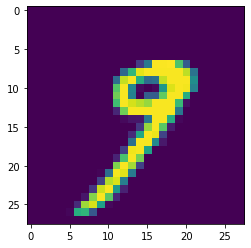

In [ ]:
plt.imshow(train_images[33]);

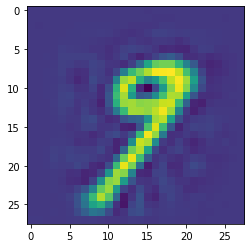

In [ ]:
apply_autoencoder = lambda image: model_autoencoder.predict(image.reshape(1,28,28)).reshape(28,28)
plt.imshow(apply_autoencoder(train_images[33]));

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(fashion_train_images, fashion_train_labels), (fashion_validation_images, fashion_validation_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


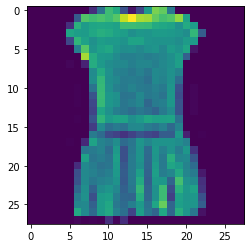

In [ ]:
plt.imshow(fashion_train_images[3]);

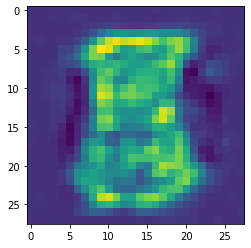

In [ ]:
plt.imshow(apply_autoencoder(fashion_train_images[3]));

In [ ]:
mean_squared_error = np.mean(np.array([np.linalg.norm(image - apply_autoencoder(image)) for image in train_images[:1000]]))
mean_squared_error

514.37256

In [ ]:
fashion_mean_squared_error = np.mean(np.array([np.linalg.norm(image - apply_autoencoder(image)) for image in fashion_train_images[:1000]]))
fashion_mean_squared_error

1444.412

In [ ]:
detect_outlier_with_threshold = lambda image,threshold: np.linalg.norm(image - apply_autoencoder(image)) > threshold
get_tpr = lambda threshold: sum([detect_outlier_with_threshold(fashion_train_images[i], threshold) for i in range(0,100)])/100
get_fpr = lambda threshold: sum([detect_outlier_with_threshold(train_images[i], threshold) for i in range(0,100)])/100

values = np.arange(0.6,5,0.01)
y_axis = [get_tpr(mean_squared_error*value) for value in values]
x_axis = [get_fpr(mean_squared_error*value) for value in values]

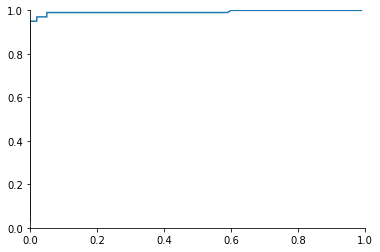

In [ ]:
ax = plt.subplot(111)
ax.plot(x_axis, y_axis)
plt.xlim(0,1)
plt.ylim(0,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

#### IIII.I.IV)

Obtenga los valores de las unidades de menor dimensión de su autoencoder tanto
para entrenamiento como para validación (FASHION-MNIST). Con ellos construya
una nueva base de datos y guarde los data-frames

### III.II Clasificación

CIFAR-10 (está en keras) contiene imágenes RGB de 32×32 (en total dimensión 3072)
para hacer clasicación de objetos. 

#### III.II.I

Observar algunos ejemplos de imágenes de CIFAR. Una buena opción para ésto es
utilizar imshow de pyplot.

In [4]:
cifar = tf.keras.datasets.cifar10
(train_images, train_labels), (validation_images, validation_labels) = cifar.load_data()

170508288/170498071 [==============================] - 3s 0us/step


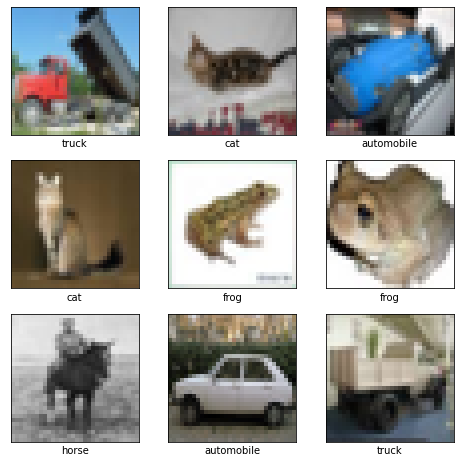

In [10]:
int_label_to_str_label = {
    0:"airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, train_images.shape[0])
  plt.imshow(train_images[img_index], cmap="gray_r")
  plt.xlabel(int_label_to_str_label[int(train_labels[img_index])]);

#### III.II.II

Construir un clasicador utilizando la base de datos como entrenamiento/validación.

In [29]:
train_images.shape

(50000, 32, 32, 3)

In [114]:
batch_size = 64
hidden_units = 2048
learning_rate = 0.01
number_of_classes = 10
image_vector_length = train_images.shape[1]*train_images.shape[2]*3

input = tf.keras.layers.Input(shape = (32, 32, 3), name="Input_layer")
flatten_input = tf.keras.layers.Flatten()(input)
normalizer = tf.keras.layers.Normalization(axis = -1)(flatten_input)
hidden = tf.keras.layers.Dense(hidden_units, activation = "ReLU", kernel_initializer = tf.keras.initializers.HeNormal())(normalizer)
output = tf.keras.layers.Dense(number_of_classes, input_dim = hidden_units, activation = "softmax")(hidden)
model_cifar_classifier = tf.keras.models.Model(inputs = input, outputs = output)
model_cifar_classifier.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 flatten_16 (Flatten)        (None, 3072)              0         
                                                                 
 normalization_14 (Normaliza  (None, 3072)             6145      
 tion)                                                           
                                                                 
 dense_29 (Dense)            (None, 2048)              6293504   
                                                                 
 dense_30 (Dense)            (None, 10)                20490     
                                                                 
Total params: 6,320,139
Trainable params: 6,313,994
Non-trainable params: 6,145
____________________________________________

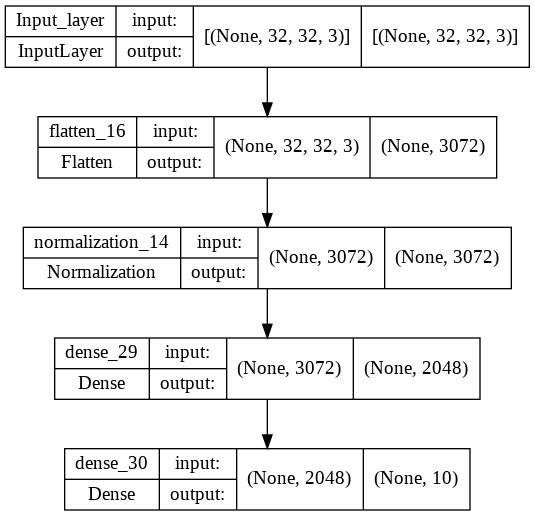

In [115]:
tf.keras.utils.plot_model(model_cifar_classifier, "arquitecturaDelClasificador.png", show_shapes=True)

In [116]:
reset_weights(model_cifar_classifier)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_cifar_classifier.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                               )
hist = model_cifar_classifier.fit(x=train_images, y=train_labels, batch_size = batch_size,
                             epochs=300, validation_data=(validation_images, validation_labels),callbacks=[es])


Epoch 1/300


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


782/782 [==============================] - 4s 4ms/step - loss: 47.8225 - val_loss: 28.7033
Epoch 2/300
782/782 [==============================] - 3s 4ms/step - loss: 24.6484 - val_loss: 21.4609
Epoch 3/300
782/782 [==============================] - 3s 4ms/step - loss: 19.2257 - val_loss: 16.9241
Epoch 4/300
782/782 [==============================] - 3s 4ms/step - loss: 14.7398 - val_loss: 18.5306
Epoch 5/300
782/782 [==============================] - 3s 4ms/step - loss: 13.2410 - val_loss: 9.9652
Epoch 6/300
782/782 [==============================] - 3s 4ms/step - loss: 11.4650 - val_loss: 11.9742
Epoch 7/300
782/782 [==============================] - 3s 4ms/step - loss: 10.2538 - val_loss: 12.8289
Epoch 8/300
782/782 [==============================] - 3s 4ms/step - loss: 9.1565 - val_loss: 8.8389
Epoch 9/300
782/782 [==============================] - 3s 4ms/step - loss: 8.1479 - val_loss: 8.0206
Epoch 10/300
782/782 [==============================] - 3s 3ms/step - loss: 7.5054 - val_l

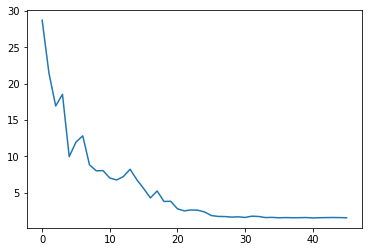

In [121]:
plt.plot(np.arange(0,len(hist.history["loss"])), hist.history["val_loss"]);

#### III.II.III

 Reportar el accuracy de validación.

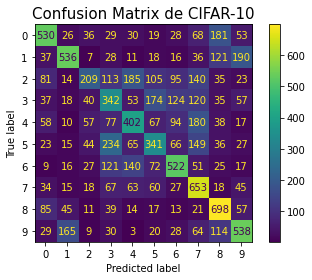

In [118]:
y_predicted = [int(np.where(output == np.max(output))[0]) for output in model_cifar_classifier.predict(validation_images)]
cm = metrics.confusion_matrix(validation_labels, y_predicted, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
cm_display = metrics.ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix de CIFAR-10", fontsize = 15);

In [119]:
metrics.accuracy_score(validation_labels, y_predicted)

0.4771